# Proyecto final de pytohn de la asignatura investigación operativa

En una localidad de segovia llamada Coca (Mi pueblo) existe una fábrica de distintos tipos de vehículos. Los vehiculos fabricados son 6 distintos; Triciclos a motor, Bicicletas con motor, Patinetes electricos , quads, motocicletas y bicicletas estándar. Lo máximo que puede producir la fabrica al dia es de 1000 unidades. Al día no se pueden producir mas de 600 unidades entre Bicicletas con motor, tricilos a motor y Bicicletas estándar. Tampoco se pueden producir mas de 350 unidades entre quads y motocicletas. Se deben producir al menos 200 unidades entre patinetes eléctricos y bicicletas estándar. Se deben producir mas de 100 bicicletas a motor y menos de 450 triciclos a motor.
Sabiendo que cada producto tiene el siguiente precio de venta: 
- Triciclos a motor: 2000€
- Bicicletas con motor: 1500€
- Patinetes eléctricos: 1000€
- Quads: 3000€
- Motocicletas: 2500€
- Bicicletas estándar: 500€

El objetivo de este problema es maximizar el beneficio de la fabrica teniendo en cuenta las restricciones que se han mencionado.


Maximizar:  
$$ 
Z = 2000X_1 + 1500X_2 + 1000X_3 + 3000X_4 + 2500X_5 + 500X_6 
$$

Sujeto a las siguientes restricciones:  
$$
\begin{aligned}
    X_1 + X_2 + X_3 + X_4 + X_5 + X_6 &\leq 1000 \\
    X_1 + X_2 + X_6 &\leq 600 \\
    X_4 + X_5 &\leq 350 \\
    X_3 + X_6  &\geq 200 \\
    X_1 &\geq 100 \\
    X_3 &\leq 450 \\
    X_1, X_2, X_3, X_4, X_5, X_6 &\geq 0
\end{aligned}
$$


## Resolución del problema mediante pyomo

In [1]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir las variables
model.x1 = Var(within=NonNegativeReals)  # Triciclos a motor
model.x2 = Var(within=NonNegativeReals)  # Bicicletas con motor
model.x3 = Var(within=NonNegativeReals)  # Patinetes eléctricos
model.x4 = Var(within=NonNegativeReals)  # Quads
model.x5 = Var(within=NonNegativeReals)  # Motocicletas
model.x6 = Var(within=NonNegativeReals)  # Bicicletas estándar

# Definir la función objetivo
model.obj = Objective(
    expr=2000*model.x1 + 1500*model.x2 + 1000*model.x3 + 3000*model.x4 + 2500*model.x5 + 500*model.x6, 
    sense=maximize
)

# Definir las restricciones
model.constraint1 = Constraint(expr=model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 <= 1000)
model.constraint2 = Constraint(expr=model.x1 + model.x2 + model.x6 <= 600)
model.constraint3 = Constraint(expr=model.x4 + model.x5 <= 350)
model.constraint4 = Constraint(expr=model.x3 + model.x6 >= 200)
model.constraint5 = Constraint(expr=model.x2 >= 100)  # Bicicletas con motor
model.constraint6 = Constraint(expr=model.x1 <= 450)  # Triciclos a motor

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar los resultados
print("\nResultados:")
print(f"Triciclos a motor (x1): {model.x1.value}")
print(f"Bicicletas con motor (x2): {model.x2.value}")
print(f"Patinetes eléctricos (x3): {model.x3.value}")
print(f"Quads (x4): {model.x4.value}")
print(f"Motocicletas (x5): {model.x5.value}")
print(f"Bicicletas estándar (x6): {model.x6.value}")
print(f"Beneficio total: {model.obj()} €")


ModuleNotFoundError: No module named 'pyomo'

# Resolucion del problema mediante el metodo grafico
Cogemos las dos primeras variables es decir X_! y X_2 para poder graficarlas 


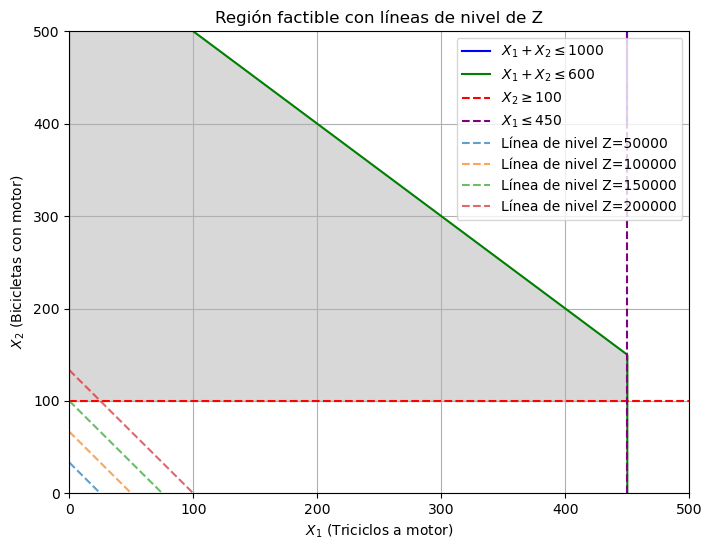

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear las restricciones
x1 = np.linspace(0, 600, 500)

# Restricciones
r1 = 1000 - x1  # X1 + X2 <= 1000
r2 = 600 - x1   # X1 + X2 <= 600
r3 = np.full_like(x1, 100)  # X2 >= 100
r4 = np.full_like(x1, 450)  # X1 <= 450

# Región factible (mínimo entre restricciones y límites)
x2 = np.minimum(r1, r2)  # Restricciones conjuntas
x2 = np.maximum(x2, 100)  # X2 >= 100
x1 = np.clip(x1, 0, 450)  # X1 <= 450

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(x1, r1, label=r'$X_1 + X_2 \leq 1000$', color='blue')
plt.plot(x1, r2, label=r'$X_1 + X_2 \leq 600$', color='green')
plt.axhline(100, color='red', linestyle='--', label=r'$X_2 \geq 100$')
plt.axvline(450, color='purple', linestyle='--', label=r'$X_1 \leq 450$')

# Rellenar la región factible
plt.fill_between(x1, np.maximum(0, 100), x2, color='gray', alpha=0.3)

# Líneas de nivel de la función objetivo Z = 2000*X1 + 1500*X2
Z_values = [50000, 100000, 150000, 200000]  # Valores de Z para las líneas de nivel
for Z in Z_values:
    x2_level = (Z - 2000 * x1) / 1500
    plt.plot(x1, x2_level, label=f'Línea de nivel Z={Z}', linestyle='--', alpha=0.7)

# Configuración del gráfico
plt.xlabel(r'$X_1$ (Triciclos a motor)')
plt.ylabel(r'$X_2$ (Bicicletas con motor)')
plt.title('Región factible con líneas de nivel de Z')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 500)
plt.ylim(0, 500)

# Mostrar la gráfica
plt.show()
